Here We use the dataset of candidates who contested the 2019 Lok Sabha Elections to examine

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset to python environment
data=pd.read_csv('Loksabha-2018.csv')
data

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,Maharashtra,YAVATMAL-WASHIM,Anil Jayram Rathod,0,IND,SHIP,MALE,0,43.0,GENERAL,Post Graduate,"Rs 48,90,000\n ~ 48 Lacs+","Rs 10,20,000\n ~ 10 Lacs+",14661,25,14686,0.766419,1.250060,1916185
2259,Telangana,ZAHIRABAD,B.B.PATIL,1,TRS,Car,MALE,18,63.0,GENERAL,Graduate,"Rs 1,28,78,51,556\n ~ 128 Crore+","Rs 1,15,35,000\n ~ 1 Crore+",434066,178,434244,28.975369,41.574183,1498666
2260,Telangana,ZAHIRABAD,MADAN MOHAN RAO,0,INC,Hand,MALE,0,49.0,GENERAL,Post Graduate,"Rs 90,36,63,001\n ~ 90 Crore+",Rs 0\n ~,427900,115,428015,28.559732,40.977823,1498666
2261,Telangana,ZAHIRABAD,BANALA LAXMA REDDY,0,BJP,Lotus,MALE,3,47.0,GENERAL,12th Pass,"Rs 5,85,77,327\n ~ 5 Crore+","Rs 52,50,000\n ~ 52 Lacs+",138731,216,138947,9.271379,13.302678,1498666


In [3]:
# renaming some column for easy understanding
data.rename(columns = {'TOTAL\nVOTES':'TOTAL VOTES','CRIMINAL\nCASES':'CRIMINAL CASES','GENERAL\nVOTES':'GENERAL VOTES','POSTAL\nVOTES':'POSTAL VOTES','OVER TOTAL ELECTORS \nIN CONSTITUENCY':'OVER TOTAL ELECTORS IN CONSTITUENCY','OVER TOTAL VOTES POLLED \nIN CONSTITUENCY':'OVER TOTAL VOTES POLLED IN CONSTITUENCY'}, inplace = True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   STATE                                    2263 non-null   object 
 1   CONSTITUENCY                             2263 non-null   object 
 2   NAME                                     2263 non-null   object 
 3   WINNER                                   2263 non-null   int64  
 4   PARTY                                    2263 non-null   object 
 5   SYMBOL                                   2018 non-null   object 
 6   GENDER                                   2018 non-null   object 
 7   CRIMINAL CASES                           2018 non-null   object 
 8   AGE                                      2018 non-null   float64
 9   CATEGORY                                 2018 non-null   object 
 10  EDUCATION                                2018 no

# Basic understanding about the data

In [5]:
data.describe()

,WINNER,AGE,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
count,2263.000000,2018.000000,2.263000e+03,2263.000000,2.263000e+03,2263.000000,2263.000000,2.263000e+03
mean,0.238179,52.273538,2.615991e+05,990.710561,2.625898e+05,15.811412,23.190525,1.658016e+06
std,0.426064,11.869373,2.549906e+05,1602.839174,2.559822e+05,14.962861,21.564758,3.145187e+05
min,0.000000,25.000000,1.339000e+03,0.000000,1.342000e+03,0.097941,1.000039,5.518900e+04
25%,0.000000,43.250000,2.103450e+04,57.000000,2.116250e+04,1.296518,1.899502,1.530014e+06
50%,0.000000,52.000000,1.539340e+05,316.000000,1.544890e+05,10.510553,16.221721,1.679030e+06
75%,0.000000,61.000000,4.858040e+05,1385.000000,4.872315e+05,29.468185,42.590233,1.816857e+06
max,1.000000,86.000000,1.066824e+06,19367.000000,1.068569e+06,51.951012,74.411856,3.150313e+06


In [6]:
data.isna().sum()

STATE                                        0
CONSTITUENCY                                 0
NAME                                         0
WINNER                                       0
PARTY                                        0
SYMBOL                                     245
GENDER                                     245
CRIMINAL CASES                             245
AGE                                        245
CATEGORY                                   245
EDUCATION                                  245
ASSETS                                     245
LIABILITIES                                245
GENERAL VOTES                                0
POSTAL VOTES                                 0
TOTAL VOTES                                  0
OVER TOTAL ELECTORS IN CONSTITUENCY          0
OVER TOTAL VOTES POLLED IN CONSTITUENCY      0
TOTAL ELECTORS                               0
dtype: int64

In [7]:
data.describe(include='O')

,STATE,CONSTITUENCY,NAME,PARTY,SYMBOL,GENDER,CRIMINAL CASES,CATEGORY,EDUCATION,ASSETS,LIABILITIES
count,2263,2263,2263,2263,2018,2018,2018,2018,2018,2018,2018
unique,36,539,2014,133,126,2,29,3,13,1979,1226
top,Uttar Pradesh,AURANGABAD,NOTA,BJP,Lotus,MALE,0,GENERAL,Post Graduate,Not Available,Rs 0\n ~
freq,274,14,245,420,420,1760,1242,1392,502,22,634


In [8]:
data.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'CRIMINAL CASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL VOTES', 'POSTAL VOTES', 'TOTAL VOTES',
       'OVER TOTAL ELECTORS IN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED IN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object')

# EDA

### Age distribution of candidates

<Axes: xlabel='AGE', ylabel='Count'>

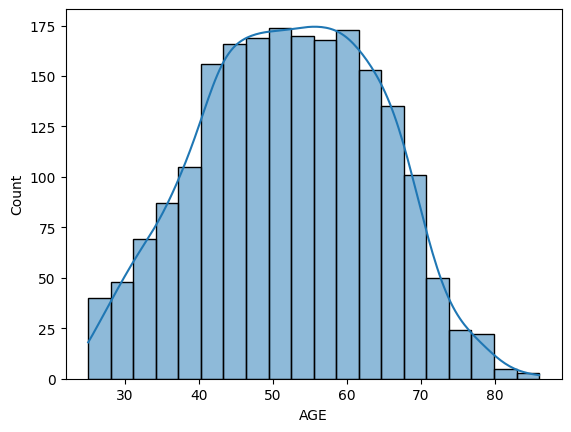

In [9]:
sns.histplot(data=data,x='AGE',kde=True,bins=20)

* The above age distribution shows us that the majority of candidate age between 40 to 64

### Gender wise distribution

In [10]:
data['GENDER'].value_counts()

GENDER
MALE      1760
FEMALE     258
Name: count, dtype: int64

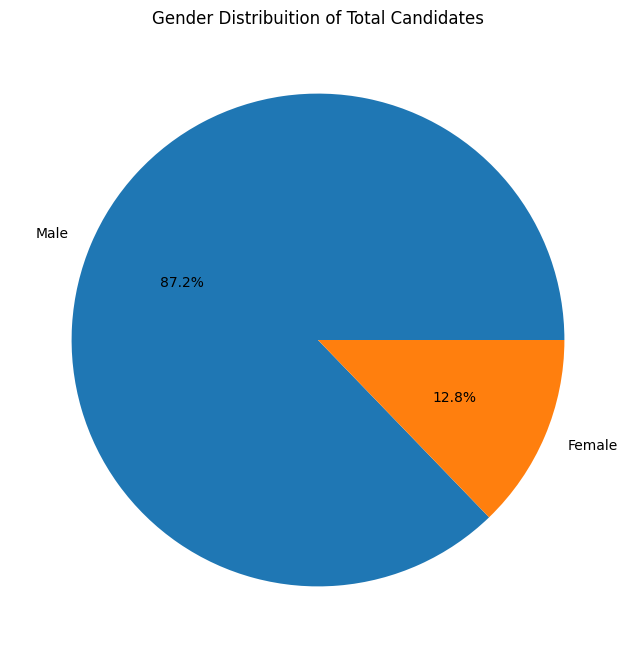

In [11]:
plt.figure(figsize=(16,8))
plt.pie(data['GENDER'].value_counts(),labels =['Male','Female'],autopct='%1.1f%%')
plt.title('Gender Distribuition of Total Candidates')
plt.show()

* 87.2% of candidates are male , only very few female candidates are there (12.8%)

### CANDIDATE COUNT FROM EACH PARTY

In [12]:
data['PARTY'].unique()

array(['BJP', 'TRS', 'INC', 'NOTA', 'BSP', 'NCP', 'VBA', 'APoI', 'CPI(M)',
       'BDJS', 'AITC', 'RSP', 'SP', 'YSRCP', 'TDP', 'JnP', 'INLD', 'SBSP',
       'IND', 'SHS', 'AAP', 'SAD', 'JKN', 'JKPDP', 'JPC', 'DMK', 'PMK',
       'NTK', 'MNM', 'AIADMK', 'RJD', 'CPI(ML)(L)', 'SSD', 'PPA', 'JD(S)',
       'NPEP', 'BMUP', 'BJD', 'AIMIM', 'HAMS', 'AHFBK', 'PPID', 'SPL',
       'ASDC', 'RLD', 'PSPL', 'JD(U)', 'BTP', 'AIFB', 'AGP', 'AIUDF',
       'ABSKP', 'PUNEKP', 'RTORP', 'JNJP', 'LTSP', 'RVNP', 'JANADIP',
       'SDPI', 'DMDK', 'ABGP', 'VCK', 'JMM', 'LIP', 'JDR', 'MOSP', 'MADP',
       'AJPR', 'PMP', 'BBMP', 'AJSUP', 'JVM', 'RMPOI', 'LJP', 'BJKVP',
       'SWP', 'NEINDP', 'RSPSR', 'ravp', 'RSOSP', 'BLSP', 'WPOI',
       'SUCI(C)', 'SJDD', 'ANC', 'JDL', 'VSIP', 'AAM', 'JKP', 'BOPF',
       'UPPL', 'CPIM', 'GGP', 'KEC(M)', 'KEC', 'JAPL', 'AKBMP', 'TJS',
       'IUML', 'BSCP', 'ADAL', 'BRPI', 'MNF', 'PRISMP', 'VPI', 'YKP',
       'NDPP', 'RLTP', 'RAHIS', 'NPF', 'BLSD', 'BVA', 'NAWPP', 'AINRC

In [13]:
data['PARTY'].value_counts()

PARTY
BJP       420
INC       413
NOTA      245
IND       201
BSP       163
         ... 
KEC(M)      1
KEC         1
JAPL        1
AKBMP       1
PHJSP       1
Name: count, Length: 133, dtype: int64

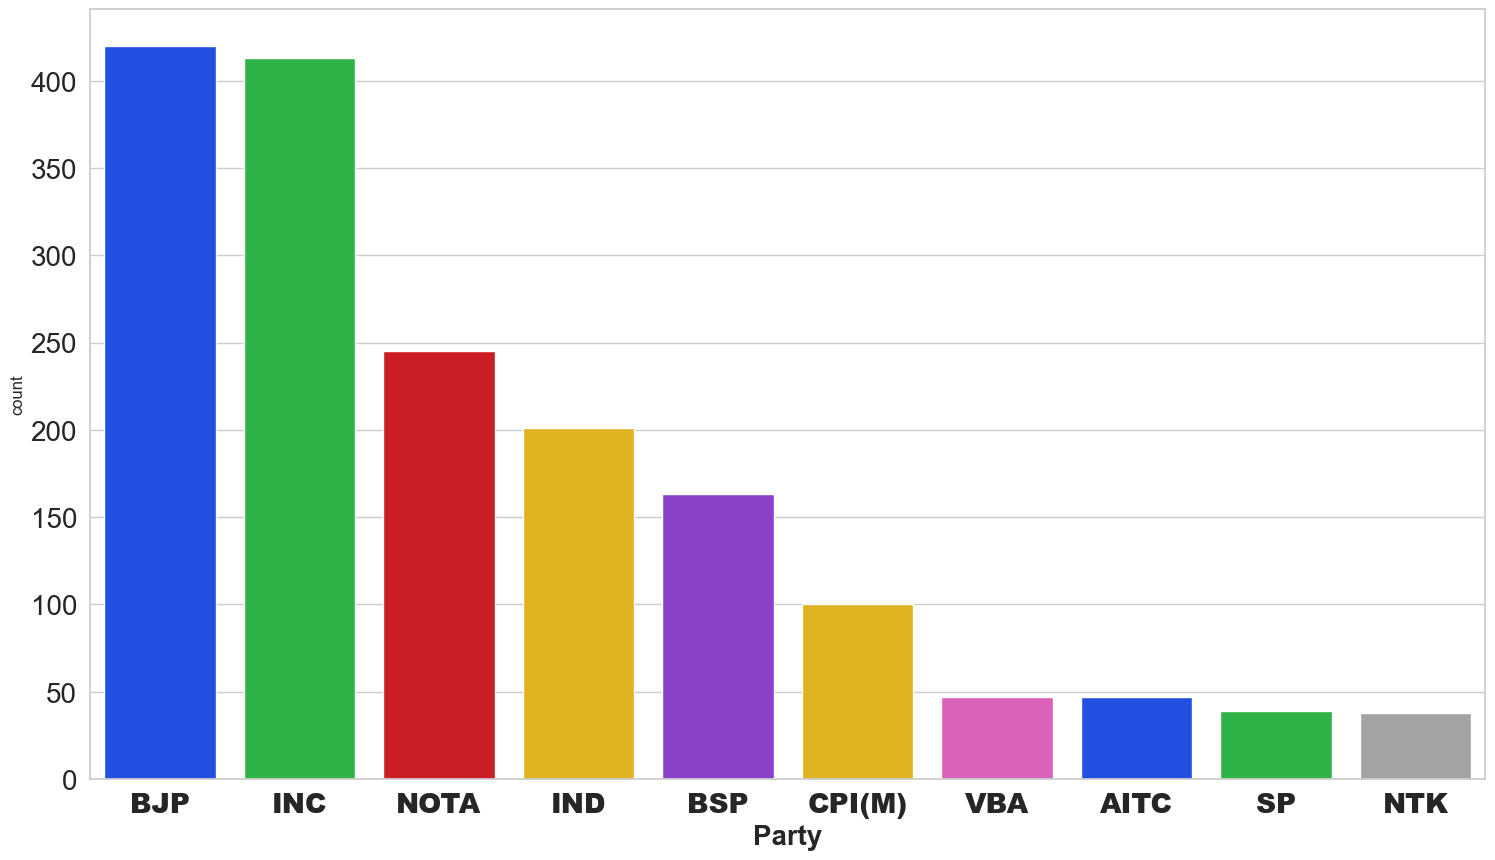

In [14]:
plt.figure(figsize=(18, 10))
sns.set(style="whitegrid")  # Optional: Set the style of the plot
sns.countplot(x='PARTY', data=data, order=data.PARTY.value_counts().iloc[:10].index, hue='PARTY', palette="bright", legend=False)
plt.xticks(fontsize=20, fontweight=1000)
plt.yticks(fontsize=20)
plt.xlabel('Party', fontsize=20, fontweight='bold')
plt.show()

* BJP and INC has more number of candidates

### EDUCATIONAL BACKGROUND

In [15]:
data.EDUCATION.value_counts()

EDUCATION
Post Graduate            502
Graduate                 441
Graduate Professional    336
12th Pass                256
10th Pass                196
8th Pass                  78
Doctorate                 73
Others                    50
Literate                  30
5th Pass                  28
Not Available             22
Illiterate                 5
Post Graduate\n            1
Name: count, dtype: int64

In [16]:
#replacing Post Graduate\n by Post Graduate
data['EDUCATION'] = data['EDUCATION'].replace(['Post Graduate\n'],'Post Graduate')
data['EDUCATION'].value_counts()

EDUCATION
Post Graduate            503
Graduate                 441
Graduate Professional    336
12th Pass                256
10th Pass                196
8th Pass                  78
Doctorate                 73
Others                    50
Literate                  30
5th Pass                  28
Not Available             22
Illiterate                 5
Name: count, dtype: int64

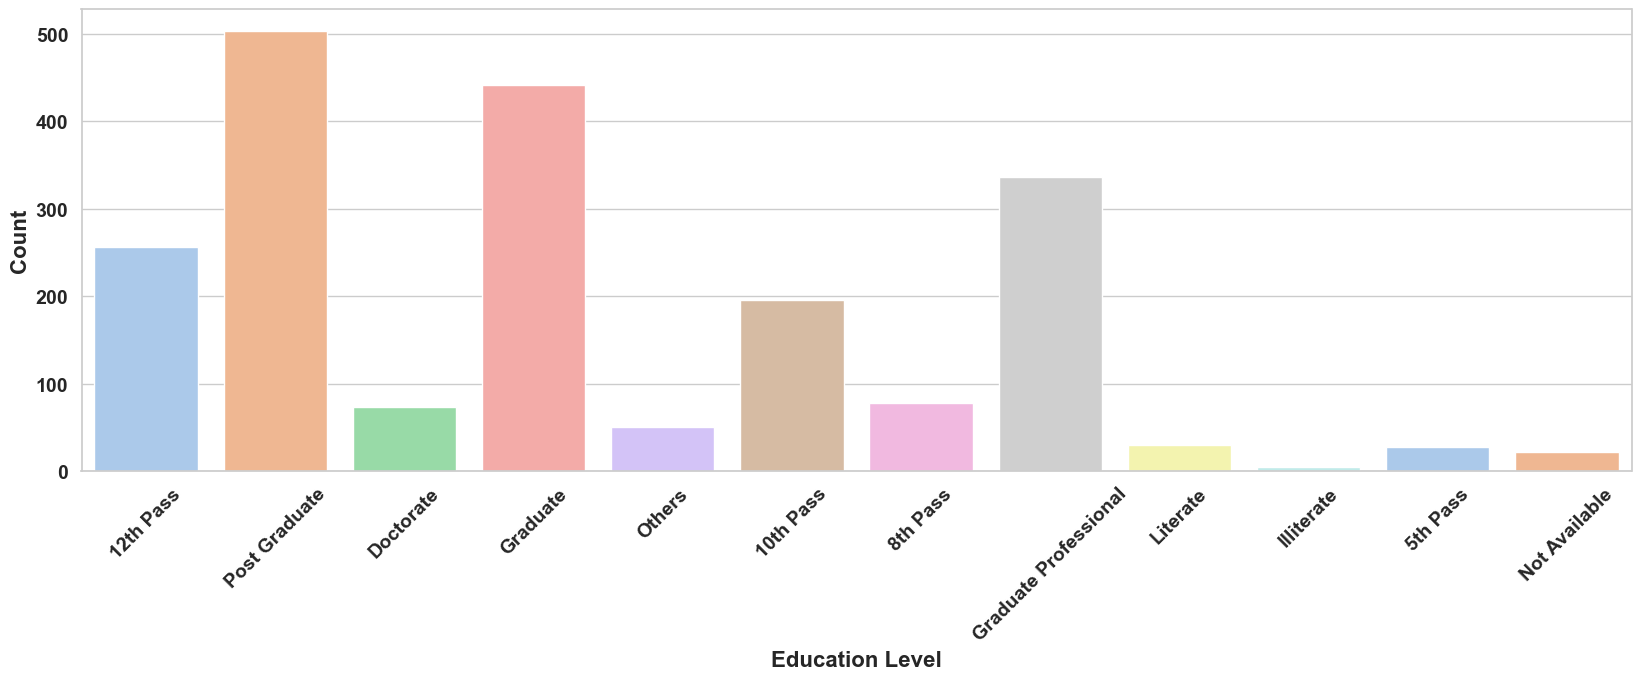

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6))
sns.set(style="whitegrid")
sns.countplot(x='EDUCATION', data=data, hue='EDUCATION', palette="pastel", legend=False)

plt.xticks(fontsize=14, fontweight='bold', rotation=45) 
plt.yticks(fontsize=14, fontweight='bold')
plt.xlabel('Education Level', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=16, fontweight='bold')

plt.show()


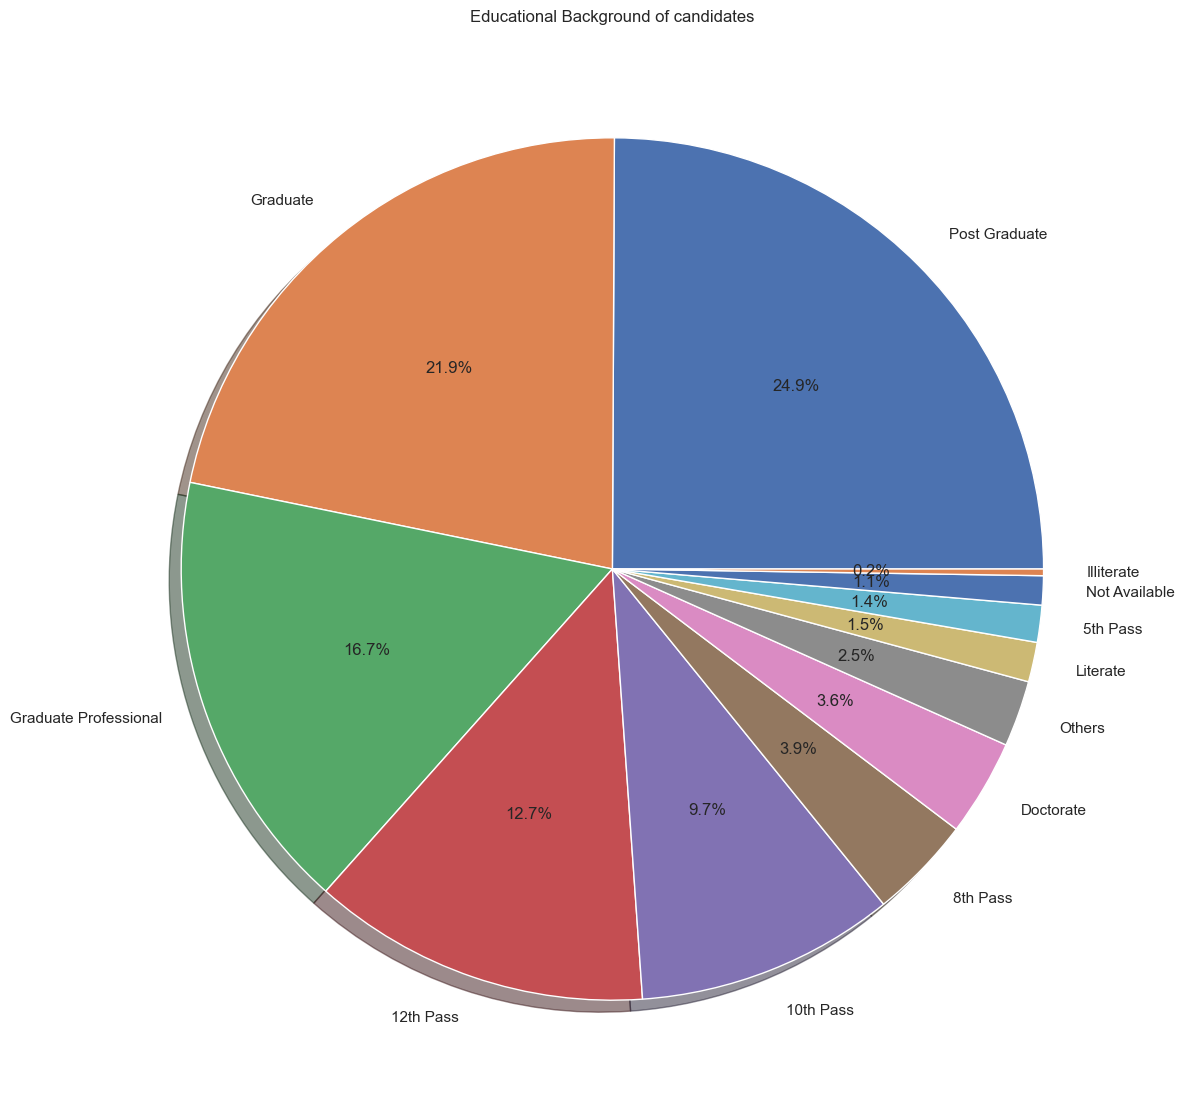

In [18]:
labels=list(dict(data['EDUCATION'].value_counts()))
d1=list(data['EDUCATION'].value_counts())
plt.figure(figsize=(16,14))
plt.pie(d1,labels = labels,shadow=True,autopct='%1.1f%%')
plt.title('Educational Background of candidates')
plt.show()

### CRIMINAL BACKGROUND

In [19]:
data['CRIMINAL CASES'] = data['CRIMINAL CASES'].replace(['Not Available'],'NA')
data['CRIMINAL CASES'].value_counts()

CRIMINAL CASES
0      1242
1       313
2       119
3       104
4        64
5        42
6        26
NA       22
7        18
8        16
10       11
9        11
11        5
14        4
12        4
13        3
15        2
16        1
52        1
240       1
31        1
41        1
42        1
28        1
22        1
204       1
24        1
40        1
18        1
Name: count, dtype: int64

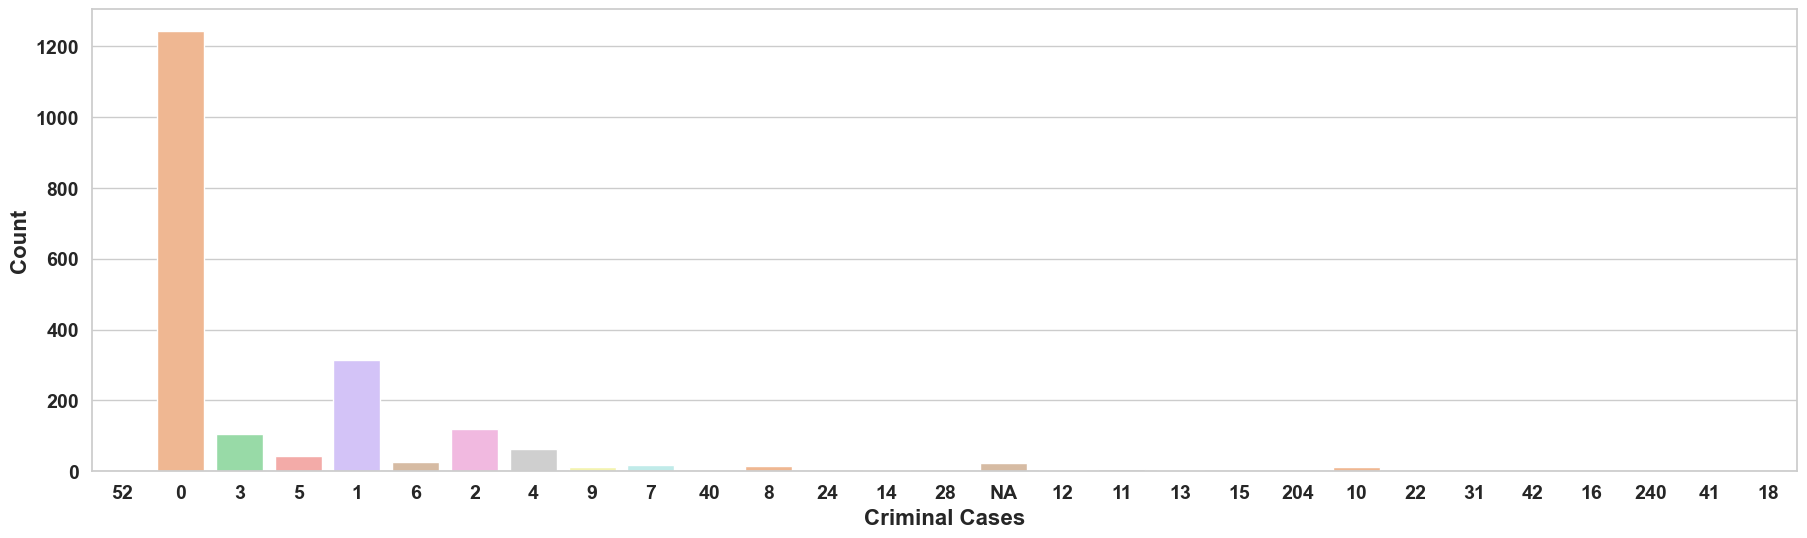

In [20]:
plt.figure(figsize=(22, 6))
sns.set(style="whitegrid")
sns.countplot(x='CRIMINAL CASES', data=data, hue='CRIMINAL CASES', palette="pastel", legend=False)
plt.xticks(fontsize=14, fontweight='bold')  # Rotate x-axis labels by 45 degrees
plt.yticks(fontsize=14, fontweight='bold')
plt.xlabel('Criminal Cases', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=16, fontweight='bold')
plt.show()


### WINNERS

In [21]:
data['WINNER'].value_counts()

WINNER
0    1724
1     539
Name: count, dtype: int64

plt.figure(figsize=(18,6))
sns.countplot(x='WINNER',data=data);

* from this we can see all constituency has selected memeber(539)

### CATEGORY

In [22]:
data['CATEGORY'].value_counts()

CATEGORY
GENERAL    1392
SC          383
ST          243
Name: count, dtype: int64

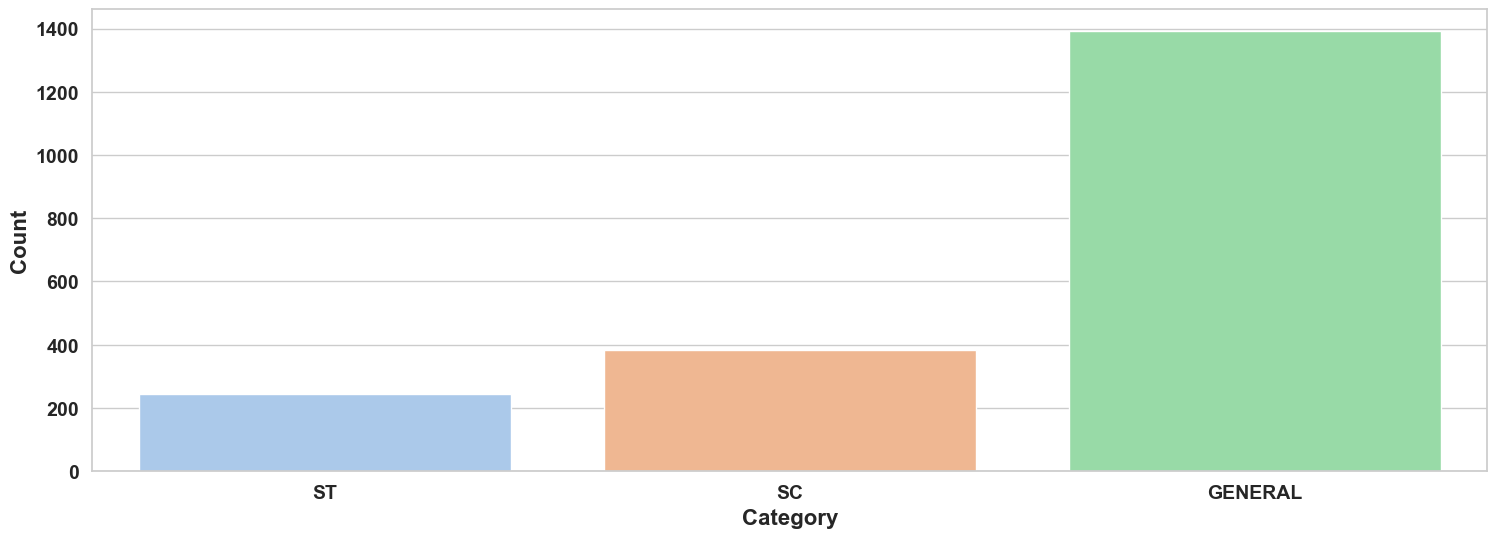

In [23]:
plt.figure(figsize=(18, 6))
sns.set(style="whitegrid")
sns.countplot(x='CATEGORY', data=data, hue='CATEGORY', palette="pastel", legend=False)
plt.xticks(fontsize=14, fontweight='bold') 
plt.yticks(fontsize=14, fontweight='bold')
plt.xlabel('Category', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=16, fontweight='bold')

plt.show()

### GENDER VS RESULT

In [24]:
data.groupby("GENDER")["WINNER"].value_counts()

GENDER  WINNER
FEMALE  0          182
        1           76
MALE    0         1297
        1          463
Name: count, dtype: int64

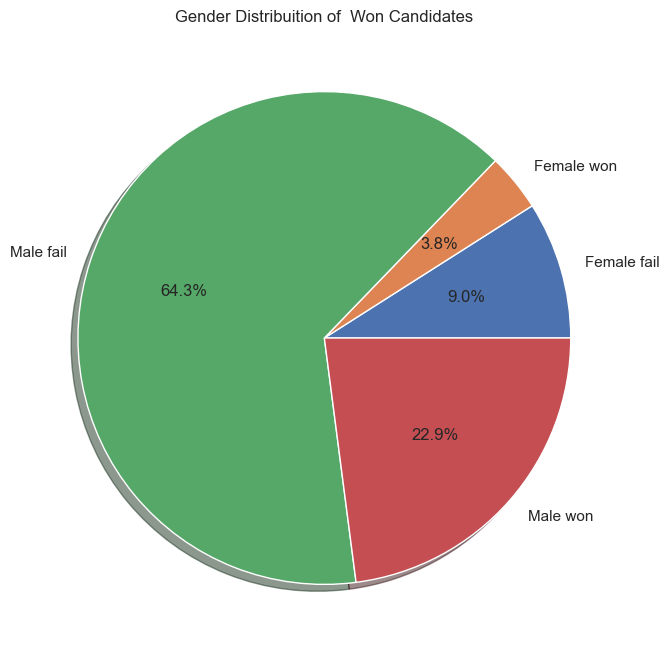

In [25]:
label=['Female fail','Female won','Male fail','Male won']
plt.figure(figsize=(16,8))
plt.pie(data.groupby("GENDER")["WINNER"].value_counts(),labels=label,shadow=True,autopct='%1.1f%%')
plt.title('Gender Distribuition of  Won Candidates')
plt.show()

### AGE VS CATEGORY

In [26]:
# result = data.groupby("CATEGORY")["AGE"].value_counts()
# pd.set_option('display.max_rows', None) 
# pd.set_option('display.max_columns', None)
# result

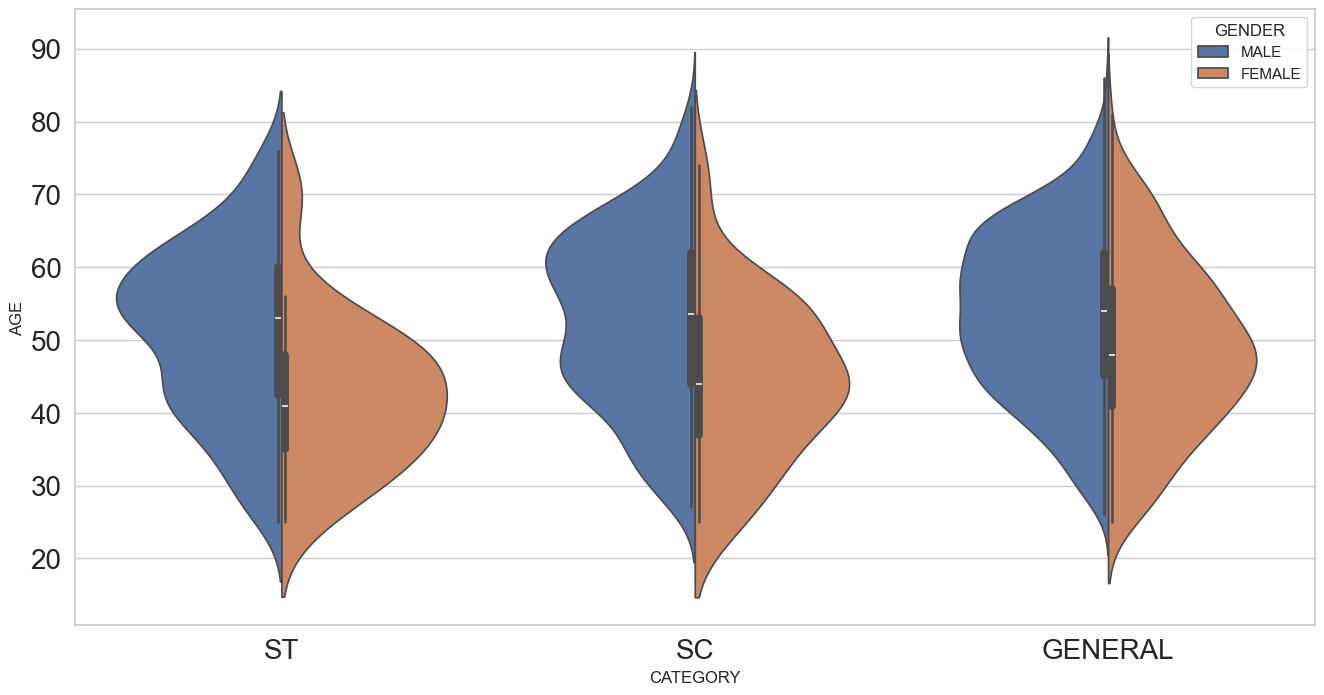

In [27]:
plt.figure(figsize=(16,8))
sns.violinplot(x='CATEGORY',y='AGE',data=data,hue='GENDER',split=True)
plt.xticks(fontsize=20,fontweight=200)
plt.yticks(fontsize=20)
plt.show()

* from this we can observe that in ST category age is concentrated on 50 to 60 range
* in SC category 55 - 65 and 45 to 50 
* in General 45 to 65

### CATEGORY VS WINNER

In [29]:
data.groupby("CATEGORY")["WINNER"].value_counts()

CATEGORY  WINNER
GENERAL   0         993
          1         399
SC        0         298
          1          85
ST        0         188
          1          55
Name: count, dtype: int64

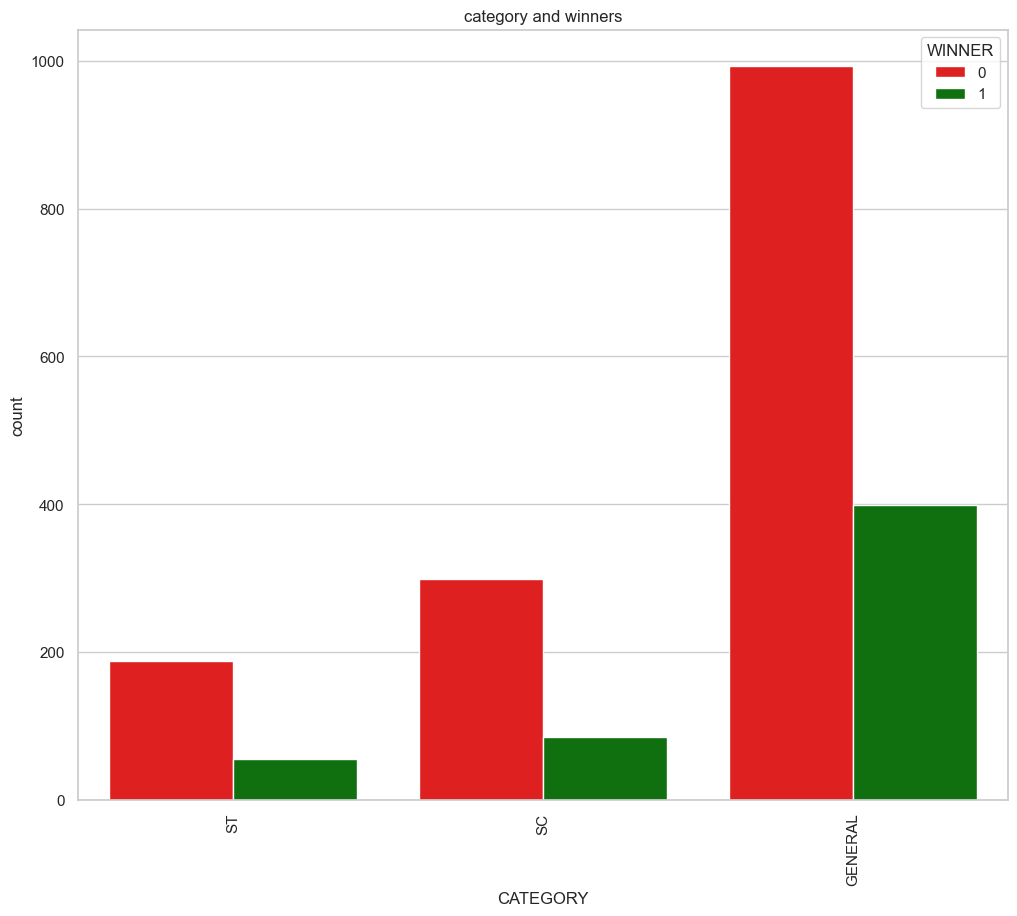

In [28]:
plt.figure(figsize=(12,10))
fig=sns.countplot(x='CATEGORY',hue='WINNER',data=data,palette=["red","green"])
plt.title('category and winners')
plt.xticks(rotation=90)

plt.show()

* from this we can understand most of the winners are from GENERAL category ,beacuse of highest number of candidates also from GENERAL category

### YOUNGEST WINNER

In [31]:
young = data[data['WINNER']==1]
young= young.sort_values('AGE').head(10)
young

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
138,Andhra Pradesh,ARUKU,GODDETI. MADHAVI,1,YSRCP,Ceiling Fan,FEMALE,0,26.0,ST,Graduate Professional,"Rs 1,41,179\n ~ 1 Lacs+",Rs 0\n ~,557561,4629,562190,38.733845,52.139840,1451418
326,West Bengal,BASIRHAT,Nusrat Jahan Ruhi,1,AITC,Flowers and Grass,FEMALE,0,28.0,GENERAL,12th Pass,"Rs 2,90,88,391\n ~ 2 Crore+","Rs 1,68,81,608\n ~ 1 Crore+",781920,158,782078,46.597833,54.547002,1678357
243,Karnataka,BANGALORE SOUTH,TEJASVI SURYA,1,BJP,Lotus,MALE,0,28.0,GENERAL,Graduate Professional,"Rs 13,46,593\n ~ 13 Lacs+",Rs 0\n ~,736605,2624,739229,33.366404,62.137994,2215489
853,Karnataka,HASSAN,PRAJWAL REVANNA,1,JD(S),A lady farmer carrying paddy on her head,MALE,0,28.0,GENERAL,Graduate Professional,"Rs 9,78,48,632\n ~ 9 Crore+","Rs 3,72,53,210\n ~ 3 Crore+",675512,1094,676606,40.932027,52.915529,1652999
916,West Bengal,JADAVPUR,MIMI CHAKRABORTY,1,AITC,Flowers and Grass,FEMALE,0,30.0,GENERAL,Graduate,"Rs 2,43,98,786\n ~ 2 Crore+","Rs 19,00,788\n ~ 19 Lacs+",687773,699,688472,37.893571,47.900935,1816857
1866,Uttar Pradesh,SANT KABIR NAGAR,PRAVEEN KUMAR NISHAD,1,BJP,Lotus,MALE,0,30.0,ST,Graduate Professional,"Rs 43,00,614\n ~ 43 Lacs+","Rs 23,26,248\n ~ 23 Lacs+",466167,1376,467543,23.818956,43.945109,1962903
1942,Sikkim,SIKKIM,INDRA HANG SUBBA,1,SKM,Table Lamp,MALE,0,30.0,GENERAL,Post Graduate,"Rs 4,78,817\n ~ 4 Lacs+",Rs 0\n ~,161143,5779,166922,38.449950,47.231159,434128
645,West Bengal,DIAMOND HARBOUR,ABHISHEK BANERJEE,1,AITC,Flowers and Grass,MALE,0,31.0,GENERAL,Graduate,"Rs 1,37,94,320\n ~ 1 Crore+",Rs 0\n ~,790725,402,791127,46.017427,56.133259,1719190
1806,Maharashtra,RAVER,Khadse Raksha Nikhil,1,BJP,Lotus,FEMALE,0,31.0,GENERAL,Graduate,"Rs 17,27,13,734\n ~ 17 Crore+",Rs 0\n ~,652212,3174,655386,36.922094,59.770125,1775051
1543,Maharashtra,NANDURBAR,Dr. Heena Vijaykumar Gavit,1,BJP,Lotus,FEMALE,0,31.0,ST,Post Graduate,"Rs 27,16,34,532\n ~ 27 Crore+","Rs 1,52,91,251\n ~ 1 Crore+",637226,1910,639136,34.158321,49.755789,1871099


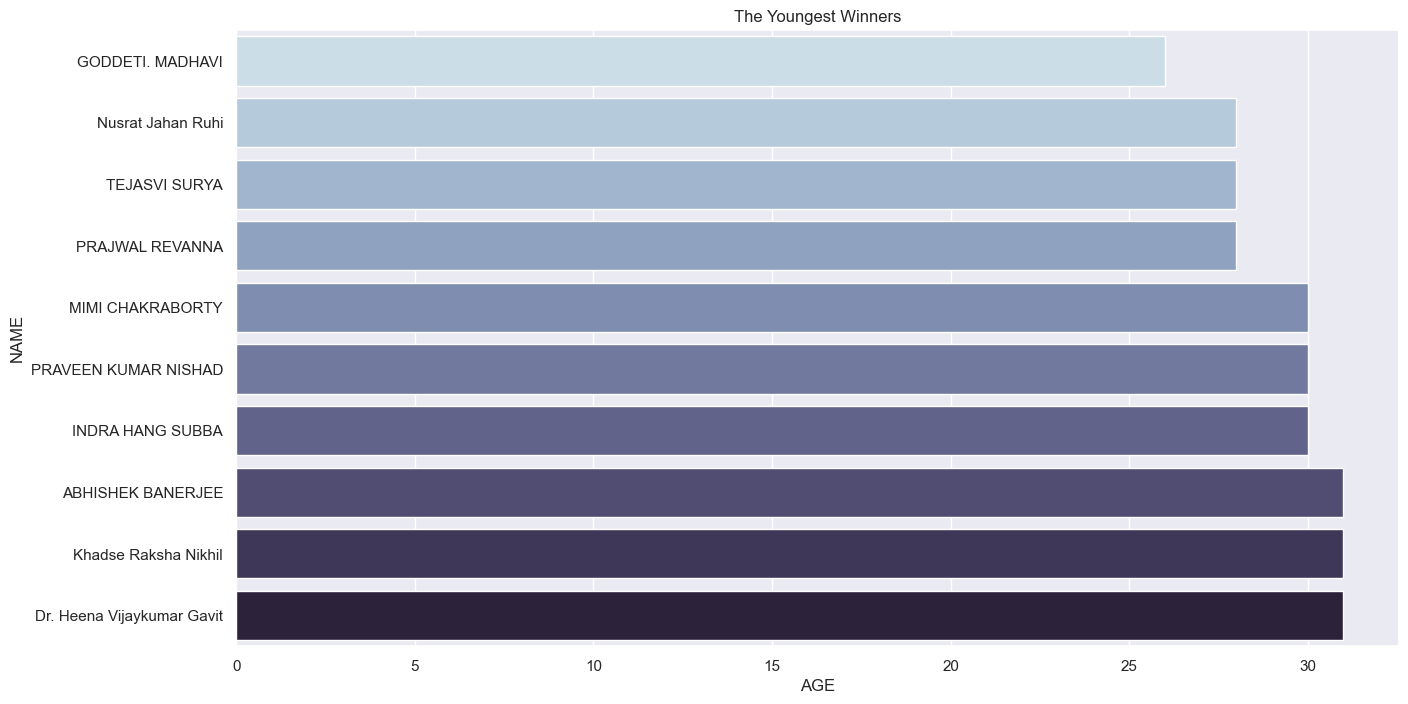

In [34]:
plt.figure(figsize=(15, 8))
sns.set(style="darkgrid")
L7 = list(young["NAME"])
L8 = list(young["AGE"])
sns.barplot(x=L8, y=L7, hue=L7, dodge=False, palette="ch:s=.25,rot=-.25", legend=False)
plt.xlabel("AGE")
plt.ylabel("NAME")
plt.title("The Youngest Winners")


plt.show()

### OLDEST WINNER

In [35]:
old= data[data['WINNER']==1]
old = old.sort_values('AGE',ascending = False).head(10)
old

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
1855,Uttar Pradesh,SAMBHAL,DR. SHAFIQUR REHMAN BARQ,1,SP,Bicycle,MALE,0,86.0,GENERAL,Graduate,"Rs 1,32,96,671\n ~ 1 Crore+",Rs 0\n ~,657505,501,658006,35.980914,55.584784,1828764
2006,Jammu & Kashmir,SRINAGAR,Farooq Abdullah,1,JKN,Plough,MALE,1,83.0,GENERAL,Graduate Professional,"Rs 12,19,04,435\n ~ 12 Crore+",Rs 0\n ~,106596,154,106750,8.245338,57.127414,1294671
1387,West Bengal,MATHURAPUR,CHOUDHURY MOHAN JATUA,1,AITC,Flowers and Grass,MALE,0,80.0,SC,Post Graduate,"Rs 1,06,67,304\n ~ 1 Crore+",Rs 0\n ~,726463,365,726828,43.994296,51.841523,1652096
1348,Uttar Pradesh,MAINPURI,MULAYAM SINGH YADAV,1,SP,Bicycle,MALE,1,79.0,GENERAL,Post Graduate,"Rs 20,56,04,593\n ~ 20 Crore+","Rs 2,20,55,657\n ~ 2 Crore+",523145,1781,524926,30.461643,53.659095,1723236
711,Punjab,FARIDKOT,Mohammad Sadique,1,INC,Hand,MALE,0,78.0,SC,5th Pass,"Rs 1,97,93,884\n ~ 1 Crore+","Rs 3,11,043\n ~ 3 Lacs+",417936,1129,419065,27.177230,42.970360,1541971
2136,Karnataka,TUMKUR,G. S. BASAVARAJ,1,BJP,Lotus,MALE,0,78.0,GENERAL,Graduate Professional,"Rs 51,07,79,150\n ~ 51 Crore+","Rs 11,38,44,867\n ~ 11 Crore+",594011,2116,596127,37.060014,47.863656,1608545
1664,Tamil Nadu,PERAMBALUR,"Dr.PAARIVENDHAR, T. R",1,DMK,Rising Sun,MALE,2,77.0,GENERAL,Post Graduate,"Rs 97,27,30,368\n ~ 97 Crore+","Rs 6,59,35,070\n ~ 6 Crore+",677005,6692,683697,49.121351,61.976232,1391853
2010,Tamil Nadu,SRIPERUMBUDUR,Baalu.T.R.,1,DMK,Rising Sun,MALE,0,77.0,GENERAL,Graduate,"Rs 20,88,06,446\n ~ 20 Crore+",Rs 0\n ~,790750,2531,793281,35.202987,56.374893,2253448
1086,West Bengal,KANTHI,Adhikari Sisir,1,AITC,Flowers and Grass,MALE,3,77.0,GENERAL,12th Pass,"Rs 3,39,79,650\n ~ 3 Crore+",Rs 0\n ~,711233,639,711872,42.880058,49.957122,1660147
535,Karnataka,CHIKKBALLAPUR,B.N.Bache Gowda,1,BJP,Lotus,MALE,0,76.0,GENERAL,Graduate Professional,"Rs 1,15,35,01,141\n ~ 115 Crore+",Rs 0\n ~,744475,1437,745912,41.238404,53.740561,1808780


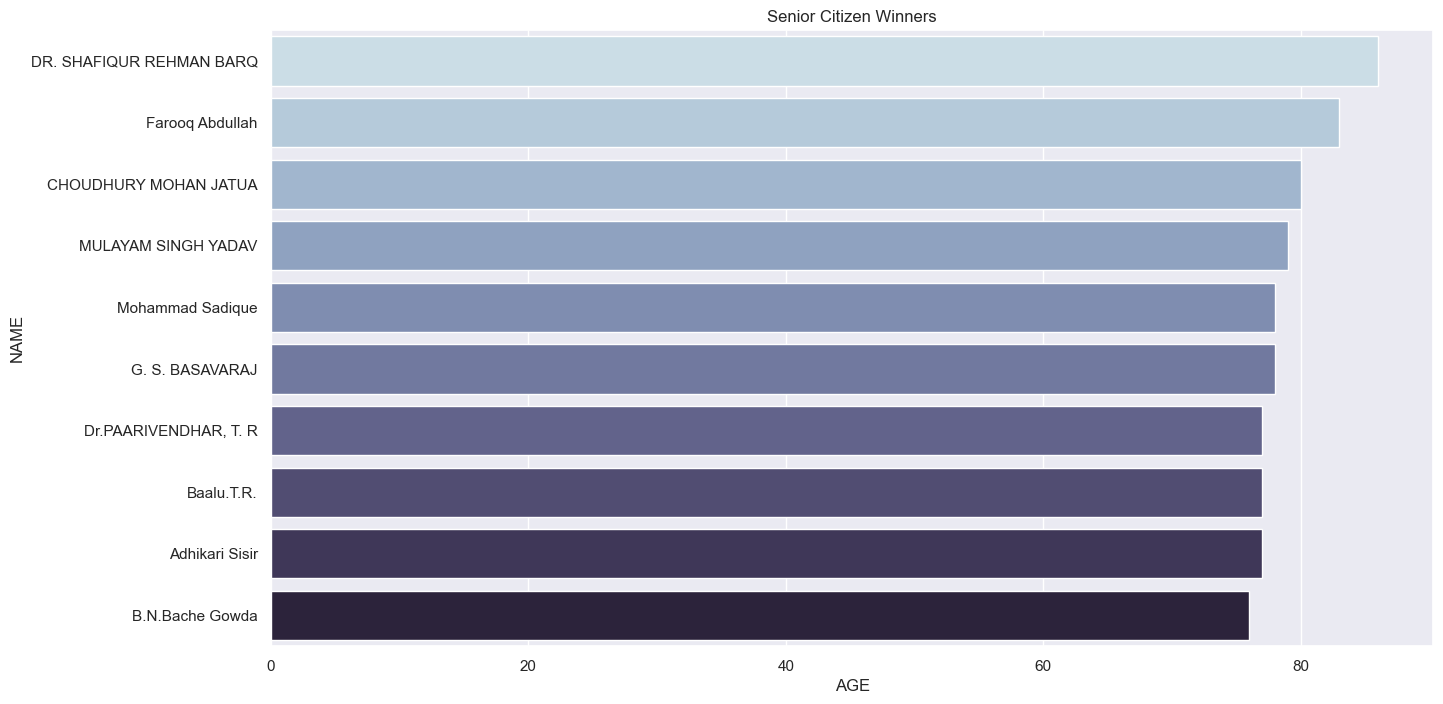

In [36]:
plt.figure(figsize=(15, 8))
sns.set(style="darkgrid")
L9 = list(old["NAME"])
L0 = list(old["AGE"])
sns.barplot(x=L0, y=L9, hue=L9, dodge=False, palette="ch:s=.25,rot=-.25", legend=False)
plt.xlabel("AGE")
plt.ylabel("NAME")
plt.title("Senior Citizen Winners")
plt.show()

### FEMALE WINNERS FROM EACH STATE

In [37]:
Female_winner= data[(data['WINNER']==1) & (data['GENDER']=='FEMALE')]

Text(0.5, 1.0, 'Female Winners from different States')

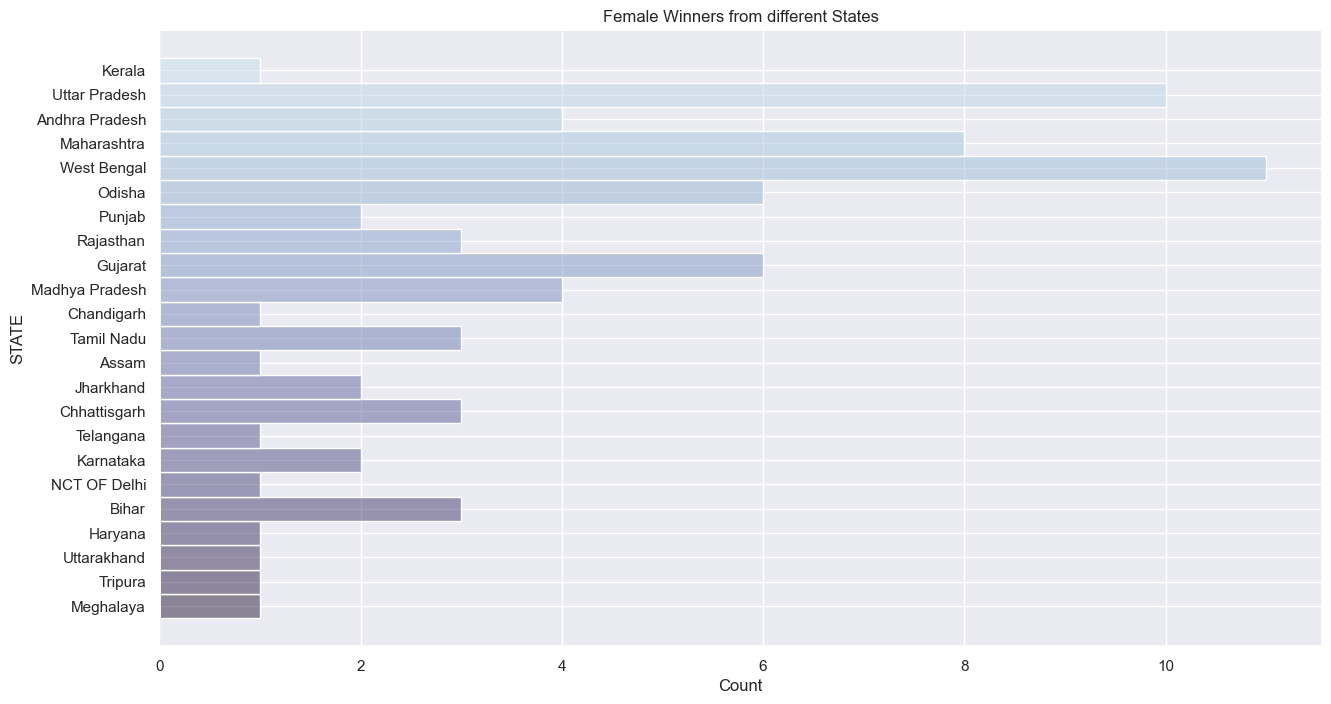

In [40]:
plt.figure(figsize=(15,8))
sns.histplot(data=Female_winner,y="STATE",hue="STATE",palette="ch:s=.25,rot=-.25",legend=False)
plt.title("Female Winners from different States")

### MALE WINNERS FFROM EACH STATE

In [41]:
male_winners = data[(data['WINNER']==1) & (data['GENDER']=='MALE')]

Text(0.5, 1.0, 'Male Winners from different States')

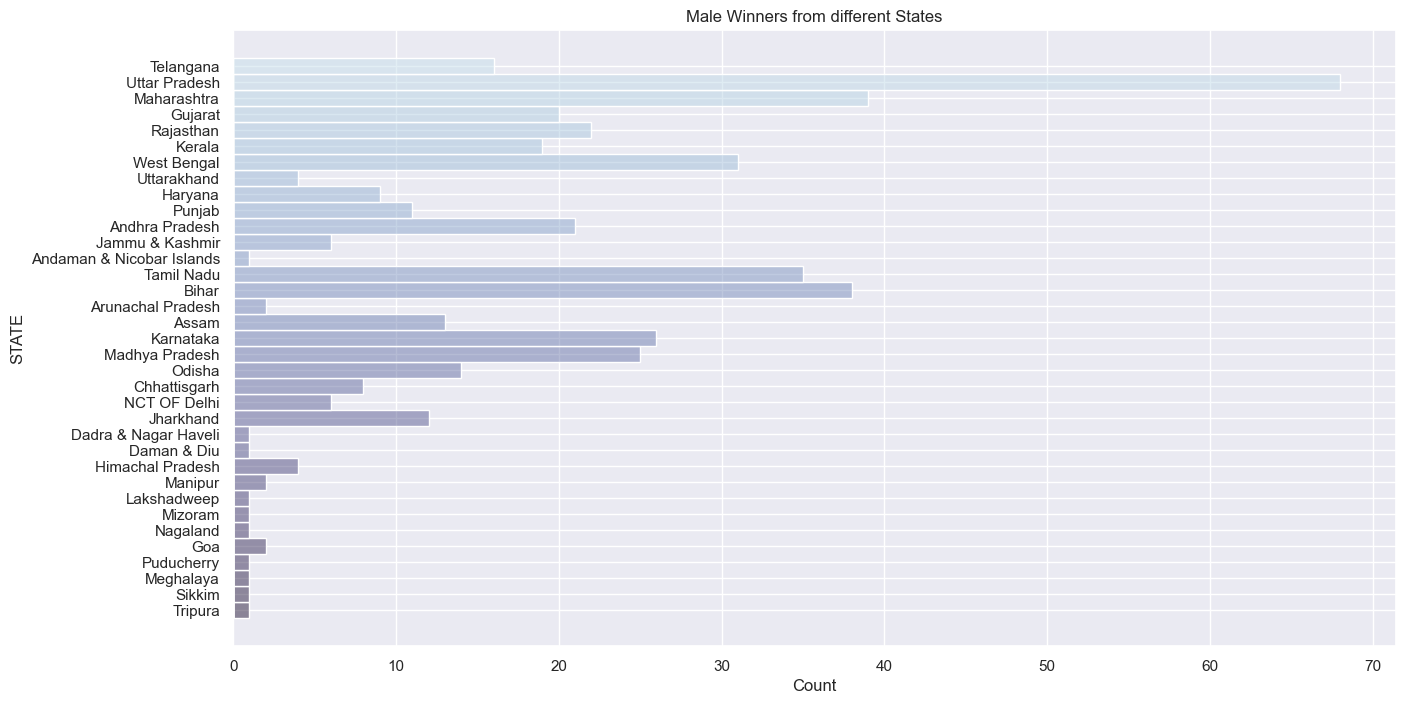

In [43]:
plt.figure(figsize=(15,8))
sns.histplot(data=male_winners,y="STATE",hue="STATE",palette="ch:s=.25,rot=-.25",legend=False)
plt.title("Male Winners from different States")